**Data preparation**

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df1 = pd.read_csv('apps.csv')
df1.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


**Clean and correct data types for accuracy.**

In [11]:
df1.dtypes

Unnamed: 0          int64
App                object
Category           object
Rating            float64
Reviews             int64
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [12]:
# Remove 'Unnamed: 0' column
df1 = df1.drop(columns=['Unnamed: 0'])

In [13]:
# Convert 'Installs' to numeric
df1['Installs'] = df1['Installs'].str.replace(',', '').str.replace('+', '').astype(int)

In [14]:
# Convert 'Price' to numeric
df1['Price'] = df1['Price'].str.replace('$', '').astype(float)

In [15]:
# Convert 'Last Updated' to datetime
df1['Last Updated'] = pd.to_datetime(df1['Last Updated'])

In [19]:
# Convert 'Size' from object to float
df1['Size'] = df1['Size'].str.replace('M', '').astype(float)


### check the missing value

In [20]:
df1.isnull().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size              1227
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [21]:
# Fill null values in 'Rating' column with the mean
df1['Rating'] = df1['Rating'].fillna(df1['Rating'].mean())

# Fill null values in 'Size' column with the mean
df1['Size'] = df1['Size'].fillna(df1['Size'].mean())

In [22]:
df1.dropna(inplace=True)

In [23]:
df1.isnull().sum()  # again check

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [24]:
df1.shape

(9648, 13)

In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9648 entries, 0 to 9658
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9648 non-null   object        
 1   Category        9648 non-null   object        
 2   Rating          9648 non-null   float64       
 3   Reviews         9648 non-null   int64         
 4   Size            9648 non-null   float64       
 5   Installs        9648 non-null   int32         
 6   Type            9648 non-null   object        
 7   Price           9648 non-null   float64       
 8   Content Rating  9648 non-null   object        
 9   Genres          9648 non-null   object        
 10  Last Updated    9648 non-null   datetime64[ns]
 11  Current Ver     9648 non-null   object        
 12  Android Ver     9648 non-null   object        
dtypes: datetime64[ns](1), float64(3), int32(1), int64(1), object(7)
memory usage: 1017.6+ KB


In [26]:
# Select numerical columns
numerical_cols = df1.select_dtypes(include=['number'])

# Describe the numerical columns
df1[numerical_cols.columns].describe()

,Rating,Reviews,Size,Installs,Price
count,9648.000000,9.648000e+03,9648.000000,9.648000e+03,9648.000000
mean,4.173309,2.168369e+05,20.411575,7.786211e+06,1.100193
std,0.494475,1.832349e+06,20.398666,5.378830e+07,16.861727
min,1.000000,0.000000e+00,0.008500,0.000000e+00,0.000000
25%,4.000000,2.500000e+01,5.300000,1.000000e+03,0.000000
50%,4.200000,9.690000e+02,16.000000,1.000000e+05,0.000000
75%,4.500000,2.944925e+04,25.000000,1.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


In [27]:
# Calculate the number of apps in each category
category_counts = df1['Category'].value_counts()

# Print the category counts
print(category_counts)

Category
FAMILY                 1828
GAME                    959
TOOLS                   825
BUSINESS                420
MEDICAL                 395
PRODUCTIVITY            374
PERSONALIZATION         374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     221
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       83
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           63
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: count, dtype: int64


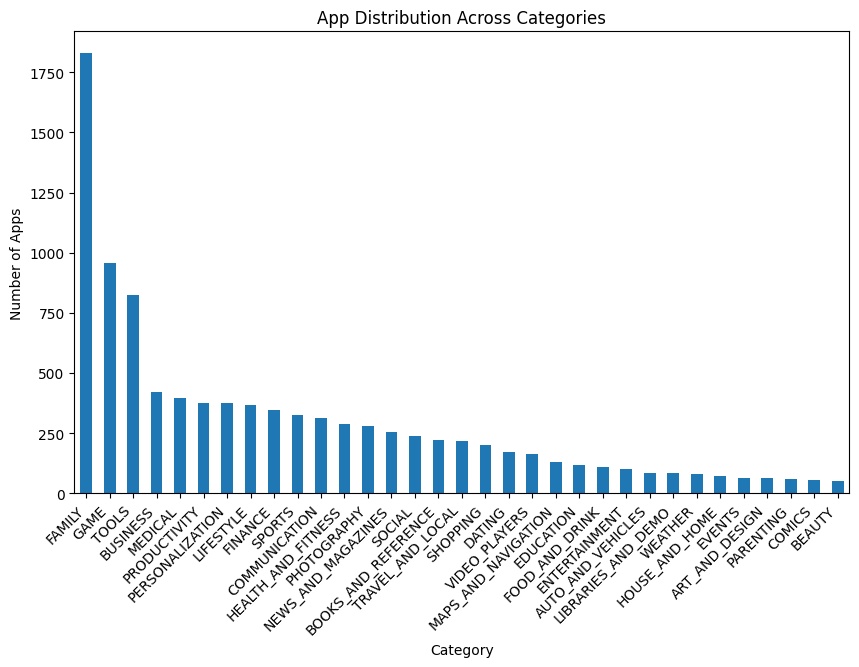

In [28]:
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.title('App Distribution Across Categories')
plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.xticks(rotation=45, ha='right')
plt.show()


In [29]:
# Calculate the average rating for each category
avg_rating_by_category = df1.groupby('Category')['Rating'].mean().sort_values(ascending=False)
print("Average rating by category:\n", avg_rating_by_category)

Average rating by category:
 Category
ART_AND_DESIGN         4.366980
EDUCATION              4.362800
EVENTS                 4.357682
BOOKS_AND_REFERENCE    4.304564
PERSONALIZATION        4.298430
PARENTING              4.278874
BEAUTY                 4.256711
GAME                   4.243736
WEATHER                4.236870
SOCIAL                 4.236137
HEALTH_AND_FITNESS     4.232370
SHOPPING               4.223819
SPORTS                 4.207572
AUTO_AND_VEHICLES      4.187987
PRODUCTIVITY           4.181408
COMICS                 4.181187
FAMILY                 4.178986
LIBRARIES_AND_DEMO     4.177890
FOOD_AND_DRINK         4.172485
MEDICAL                4.168330
PHOTOGRAPHY            4.158428
HOUSE_AND_HOME         4.153769
ENTERTAINMENT          4.135294
NEWS_AND_MAGAZINES     4.131741
COMMUNICATION          4.131179
BUSINESS               4.126427
FINANCE                4.122752
LIFESTYLE              4.108077
TRAVEL_AND_LOCAL       4.084675
TOOLS                  4.056861
VI

### Correlation Analysis

In [30]:
# Analyze the relationship between app size and rating
print("\nCorrelation between app size and rating:", df1['Size'].corr(df1['Rating']))


Correlation between app size and rating: 0.05651106883501471


In [31]:
# Examine the relationship between popularity (installs) and price
print("\nCorrelation between installs and price:", df1['Installs'].corr(df1['Price']))


Correlation between installs and price: -0.009412776639712435


In [33]:
# Analyze the distribution of app prices across different categories
price_by_category = df1.groupby('Category')['Price'].describe()
print("\nApp price distribution by category:\n", price_by_category)


App price distribution by category:
                       count      mean        std  min  25%  50%  75%     max
Category                                                                    
ART_AND_DESIGN         63.0  0.094762   0.427192  0.0  0.0  0.0  0.0    1.99
AUTO_AND_VEHICLES      85.0  0.158471   1.111872  0.0  0.0  0.0  0.0    9.99
BEAUTY                 53.0  0.000000   0.000000  0.0  0.0  0.0  0.0    0.00
BOOKS_AND_REFERENCE   221.0  0.541946   1.591991  0.0  0.0  0.0  0.0    6.49
BUSINESS              420.0  0.417357   4.660552  0.0  0.0  0.0  0.0   89.99
COMICS                 56.0  0.000000   0.000000  0.0  0.0  0.0  0.0    0.00
COMMUNICATION         315.0  0.263937   1.357462  0.0  0.0  0.0  0.0   19.99
DATING                171.0  0.160468   0.943390  0.0  0.0  0.0  0.0    7.99
EDUCATION             119.0  0.150924   0.828158  0.0  0.0  0.0  0.0    5.99
ENTERTAINMENT         102.0  0.078235   0.573472  0.0  0.0  0.0  0.0    4.99
EVENTS                 64.0  1.718594 

In [34]:
# Investigate the relationship between rating and number of reviews
print("\nCorrelation between rating and reviews:", df1['Rating'].corr(df1['Reviews']))


Correlation between rating and reviews: 0.05501009198758587


# Sentiment Analysis

In [35]:
!pip install nltk

In [36]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [37]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Ashish\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [38]:
# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

In [39]:
# Function to get sentiment scores
def get_sentiment_scores(text):
  scores = analyzer.polarity_scores(text)
  return scores['compound']

In [40]:
# Function to get sentiment scores
def get_sentiment_scores(text):
  # Check if the text is a string
  if isinstance(text, str):
    scores = analyzer.polarity_scores(text)
    return scores['compound']
  else:
    # Handle non-string values (e.g., return 0 or handle NaN)
    return 0

In [41]:
# Apply the function to the 'Reviews' column (assuming it contains the review text)
df1['Sentiment_Score'] = df1['Reviews'].apply(get_sentiment_scores)

In [42]:
# Calculate the average sentiment score
average_sentiment = df1['Sentiment_Score'].mean()
print(f"Average Sentiment Score: {average_sentiment}")

Average Sentiment Score: 0.0


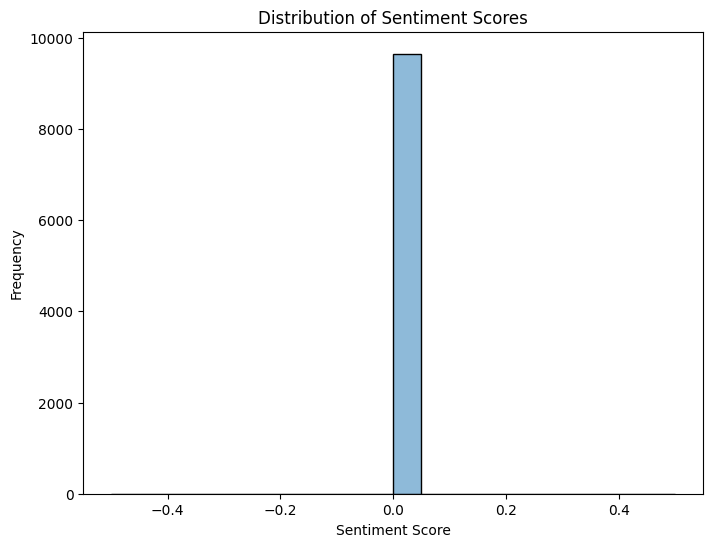

In [43]:
# Analyze the distribution of sentiment scores
plt.figure(figsize=(8, 6))
sns.histplot(df1['Sentiment_Score'], bins=20, kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

In [53]:
import seaborn as sns


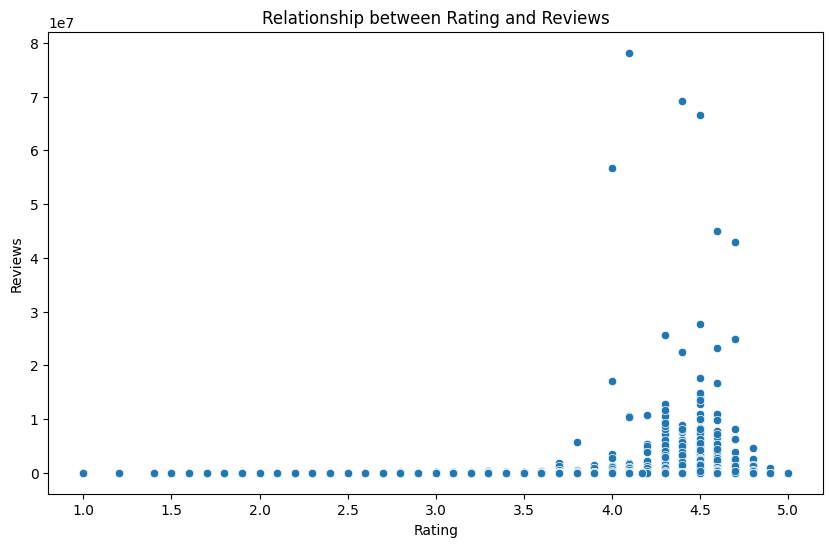

In [54]:
# Create a scatter plot to visualize the relationship between Rating and Reviews
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rating', y='Reviews', data=df1)
plt.title('Relationship between Rating and Reviews')
plt.xlabel('Rating')
plt.ylabel('Reviews')
plt.show()

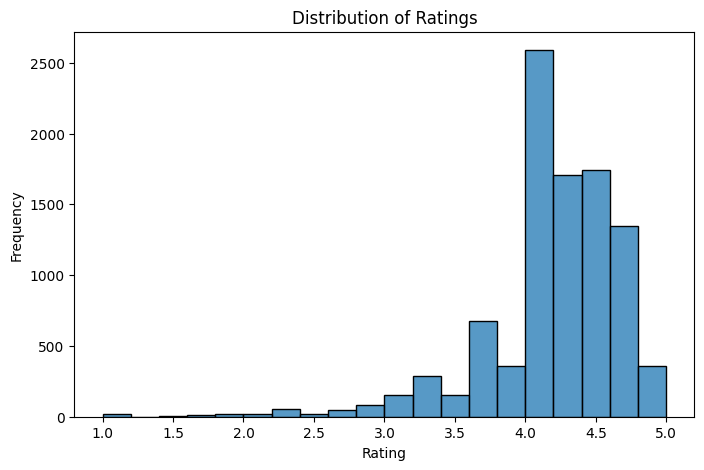

In [55]:
# Create a histogram to visualize the distribution of Ratings
plt.figure(figsize=(8, 5))
sns.histplot(df1['Rating'], bins=20)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

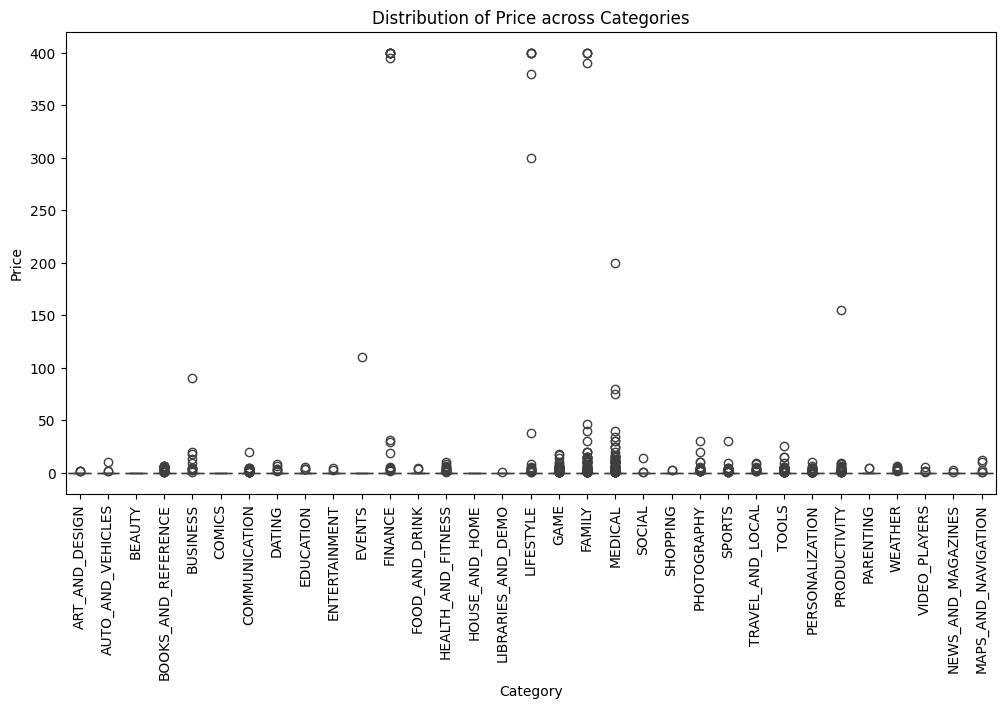

In [56]:
# Create a box plot to visualize the distribution of Price across different Categories
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Price', data=df1)
plt.title('Distribution of Price across Categories')
plt.xlabel('Category')
plt.ylabel('Price')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

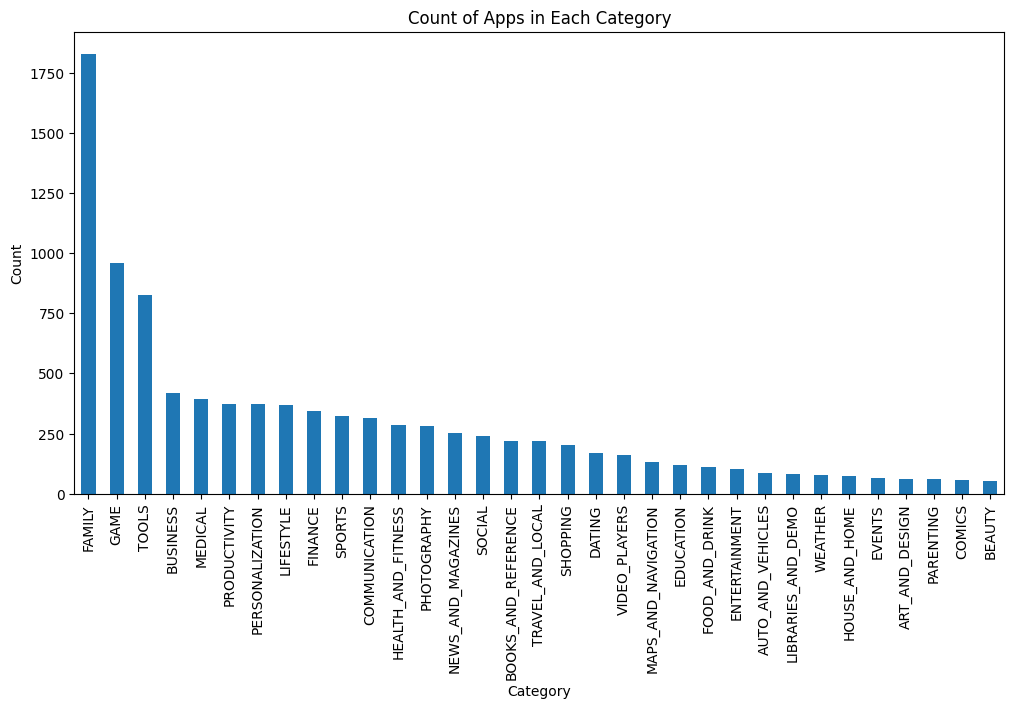

In [57]:
# Create a bar chart to visualize the count of apps in each Category
plt.figure(figsize=(12, 6))
df1['Category'].value_counts().plot(kind='bar')
plt.title('Count of Apps in Each Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

# Sentiment Analysis of user_reviews data_set

In [58]:
df= pd.read_csv("user_reviews.csv")

In [59]:
df.head(5)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [60]:
round(df['Translated_Review'].isnull().sum()/df.shape[0]*100,2)

41.79

In [61]:
df_sentiment = df.dropna(subset=['Sentiment'])

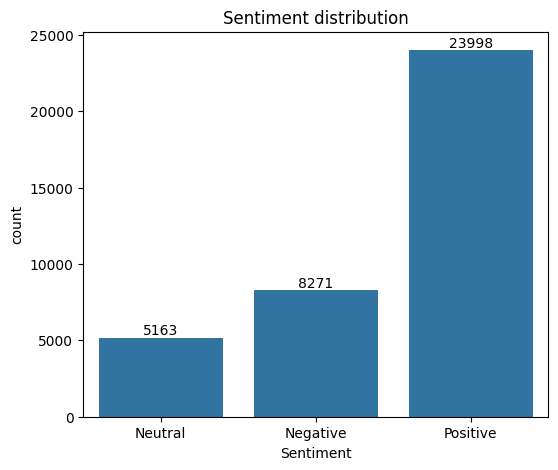

In [62]:
plt.figure(figsize=(6,5))
senti = df_sentiment['Sentiment'].value_counts().sort_values().reset_index()
ax = sns.barplot(data=senti, x='Sentiment', y='count')
ax.bar_label(ax.containers[0])
plt.title("Sentiment distribution")
plt.show()

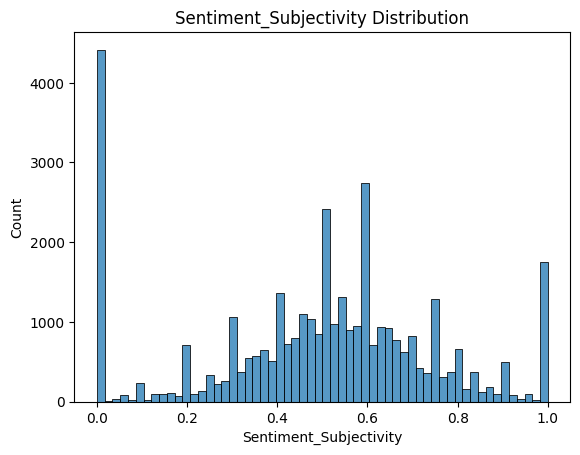

In [63]:
sns.histplot(df_sentiment['Sentiment_Subjectivity'])
plt.title("Sentiment_Subjectivity Distribution")
plt.show()